<a href="https://colab.research.google.com/github/thatguyshzr/stable_diffusion_notebook/blob/main/Stable_Diffusion_with_%F0%9F%A7%A8_diffusers_No_Filter_SHZR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Github repo

https://github.com/thatguyshzr/stable_diffusion_notebook

### Prerequisite (one time setup)
You'll need access to the weights
- Make an account here: https://huggingface.co
- Go to https://huggingface.co/CompVis/stable-diffusion-v1-4
- Click ```Access Repository```
- Go to https://huggingface.co/settings/tokens
- Click ```New Token```
- ```Name``` = whatever you want; ```Role``` = write; Click ```Generate a Token```

Copy that token


### Setup
Need to run this cell only once.

It'll take a while.

Check if GPU active

In [2]:
from tensorflow import test
# assert test.is_gpu_available(), "In taskbar, click 'Runtime' > 'Change runtime type' > 'Hardware accelerator'=GPU"

In [3]:
!pip install diffusers==0.2.4
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112 kB 31.1 MB/s 
     |████████████████████████████████| 120 kB 71.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 33.1 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 6.6 MB 59.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 30.8 MB/s 


In [4]:
from google.colab import output
output.enable_custom_widget_manager()

### Access the weights
- Run this cell
- Paste the token (you can find your token here https://huggingface.co/settings/tokens)
- Click login

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

### Stable Diffusion Pipeline
This will also take a while.

Expand to turn on NSFW filter.

In [6]:
filter_out_nsfw = False #@param {type:"boolean"}

In [7]:
import torch
from diffusers import StableDiffusionPipeline

print('Creating pipeline....')
# make sure you're logged in with `huggingface-cli login`
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", 
                                            #    revision="fp16", torch_dtype=torch.float16, 
                                               use_auth_token=True) 
print('Pipeline created.')

Creating pipeline....


Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/592 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

Pipeline created.


In [8]:
def dummy(images, **kwargs): return images, filter_out_nsfw 
pipe.safety_checker = dummy


In [9]:
pipe = pipe.to("cuda")



---


### No need to run the above cells again.

### Make images
These are some recommendations to choose good image sizes:
- Make sure `height` and `width` are both multiples of `8`.
- Going below 512 might result in lower quality images.
- Going over 512 in both directions will repeat image areas (global coherence is lost).
- The best way to create non-square images is to use `512` in one dimension, and a value larger than that in the other one.

0it [00:00, ?it/s]

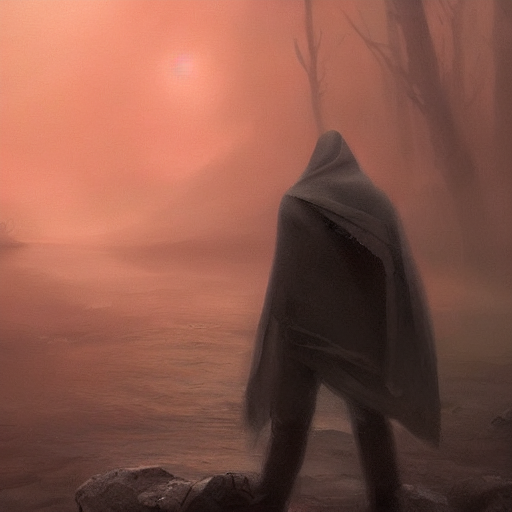

In [10]:
from torch import autocast

num_images = 1 #@param {type:"number"}
prompt_text= "dream portrait of grim reaper standing on edge of river of souls, foggy vibe, intricate, cinematic lighting, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration,4k, 8k, 32k, uhd" #@param {type:"string"}
width= 512 #@param {type:"number"}
height= 512 #@param {type:"number"}

prompt = [prompt_text] * num_images

with autocast("cuda"):
  images = pipe(prompt, width= width, height= height)["sample"]

for i in images: display(i)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

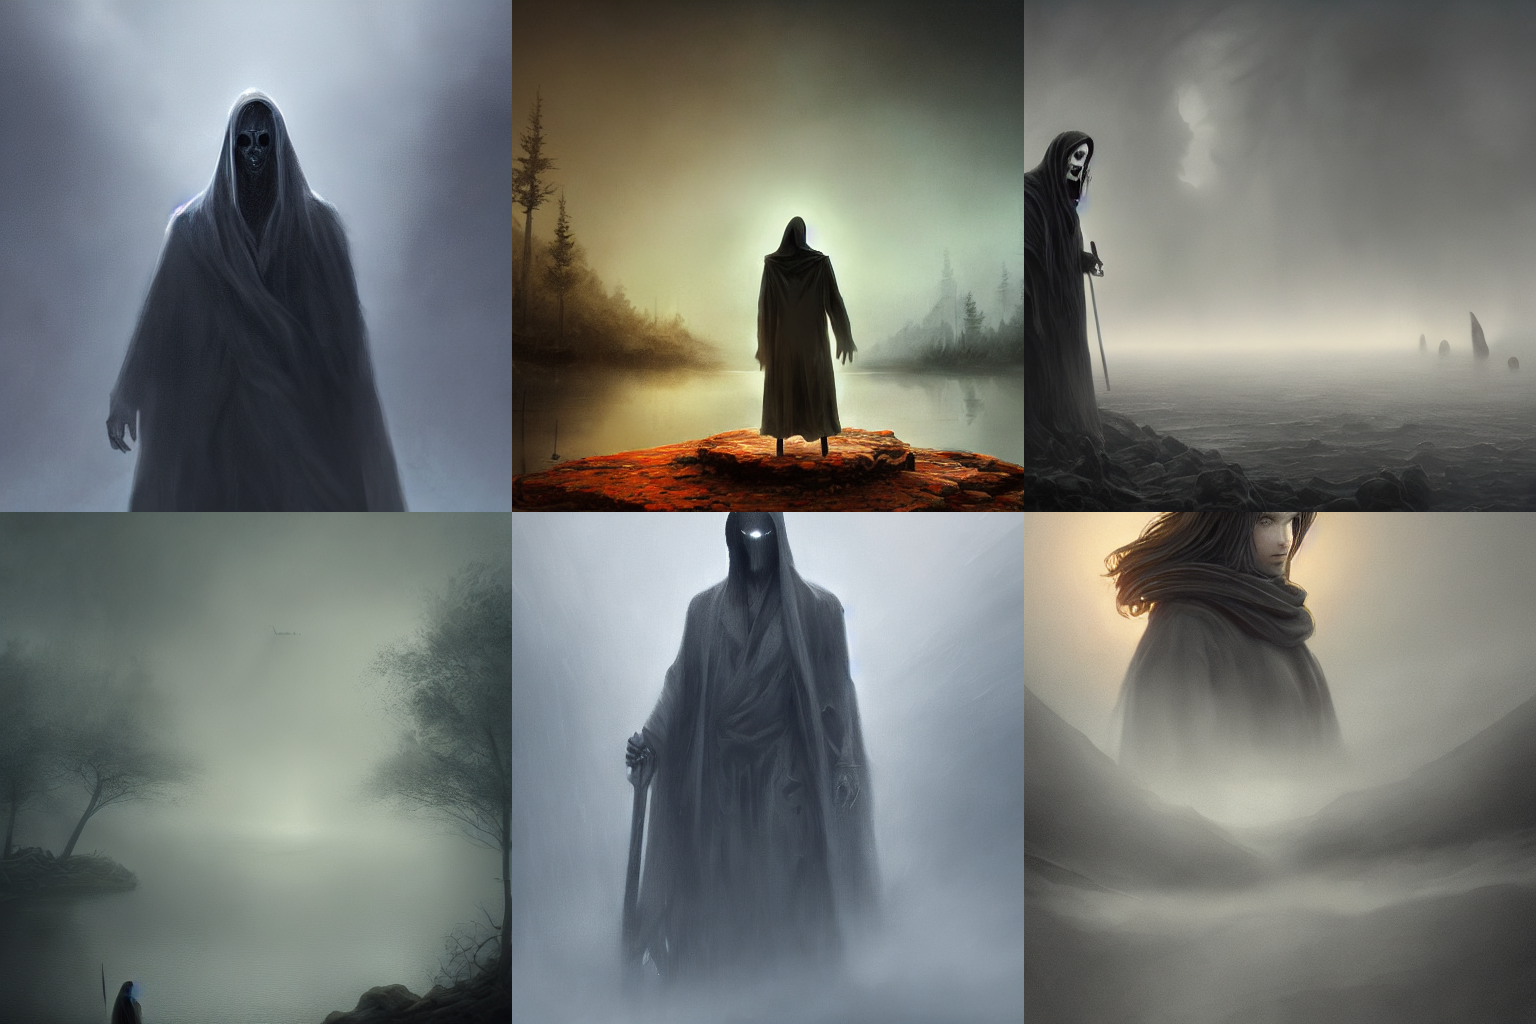

In [11]:
from PIL import Image
#@title Collage of images
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
        
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

num_cols = 3 #@param {type:"integer"}
num_rows = 2 #@param {type:"integer"}
prompt_text= "dream portrait of grim reaper standing on edge of river of souls, foggy vibe, intricate, cinematic lighting, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration,4k, 8k, 32k, uhd" #@param {type:"string"}
width= 512 #@param {type:"integer"}
height= 512 #@param {type:"integer"}

prompt = [prompt_text] * num_cols

all_images = []
for i in range(num_rows):
    with autocast("cuda"):
      images = pipe(prompt, width= width, height= height)["sample"]
    all_images.extend(images)

grid = image_grid(all_images, rows=num_rows, cols=num_cols)
grid